# Anomaly Detection - Project 2



## Tutorial

we will implement an anomaly detection algorithm using the Gaussian model to detect anomalous behavior in a 2D dataset first and then a high-dimensional dataset.

Loading relevant libraries and the dataset

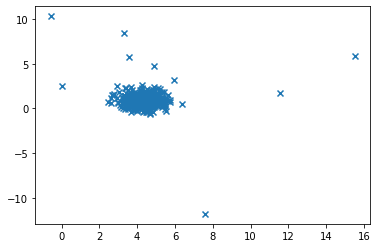

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=1,
                       cluster_std=0.6, random_state=0)
X_append, y_true_append = make_blobs(n_samples=10,centers=1,
                                    cluster_std=5,random_state=0)
X = np.vstack([X,X_append]) # adding the x_append rows to the original array of X
y_true = np.hstack([y_true, [1 for _ in y_true_append]]) # adding y_true_append coloumns to the original array of y_true
X = X[:, ::-1] # flip axes for better plotting - why did we do that?
plt.scatter(X[:,0],X[:,1],marker="x");

Here we've manufactured a dataset where some points are visibly outliers from the main distribution.

We can see this from looking at the plot, but how do we robustly identify the outliers? 

That's where a Gaussian estimation comes in. For this dataset, we only need a single Gaussian, for which we are gonna calculate the mean and standard deviation. Then, we're able to find the points that don't seem likely to have originated from that distribution - these are our outliers!

First, we need to calculate the mean and variance for our data. Complete the function below to generate these values using these formulae:

$$\mu = \frac{1}{m} \sum_{i=1}^{m}X_i$$

$$\sigma^2 = \frac{1}{m} \sum_{i=1}^{m}(X_i-\mu)^2$$

In [ ]:
def estimateGaussian(X):
    """
     This function provides an estimate of mean and variance 
     of a Gaussian distribution along multiple dimensions
     using X, an N-dimensional vector
    """
    
    m = X.shape[0] #'[0]' in shape[0] means return only the rows, had there been no [0], then output would be (rows,columns) 
    
    #compute mean of X
    sum_ = np.sum(X,axis=0) #axis = 0 means along columns
    mu = 1/m *sum_
    print("mean of X is", mu)
    
    # compute variance of X
    var = 1/m * np.sum((X - mu)**2,axis=0)
    print("variance of X is ", var)
    
    return mu,var
mu, sigma = estimateGaussian(X)

mean of X is [4.30770882 0.9756171 ]
variance of X is  [0.94147734 1.25990509]


Now, we will calculate for each point in X, the probability of the distribution $N(\mu,\sigma^2)$ generating that point randomly. This has been completed for you, although it is important to understand how the calculation of the PDF works.

In [ ]:
def multivariateGaussian(X, mu, sigma):
    """
    This function computes the probability density function of a multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p
p = multivariateGaussian(X, mu, sigma)
print(p) #has only one column which states the probability of the point to be in that cluster

[1.14372564e-01 1.34958961e-01 1.43612050e-01 1.42299087e-01
 9.13712186e-02 8.55941312e-02 4.68240258e-02 1.21375203e-01
 1.02431905e-01 1.15288577e-01 7.86816997e-02 1.45340735e-01
 1.39595203e-01 1.22607393e-01 1.30647273e-01 1.38104619e-01
 1.42770647e-01 8.87545860e-02 1.29903618e-01 1.27032472e-01
 1.41351478e-01 1.28275607e-01 1.33684728e-01 1.42781106e-01
 9.32548041e-02 1.40465740e-01 1.16482935e-01 3.26217842e-02
 1.27768034e-01 1.40703489e-01 1.31726540e-01 5.68406205e-02
 1.43043322e-01 1.36223637e-01 1.13402764e-01 9.72356144e-02
 9.48531746e-02 1.33446142e-01 1.21499229e-01 4.97153521e-02
 1.09486962e-01 1.04598457e-01 1.33181817e-01 1.28145276e-01
 1.21108955e-01 9.37073350e-02 1.34444713e-01 1.45205701e-01
 1.33931685e-01 1.06246973e-01 1.39179756e-01 7.44308998e-02
 9.90408123e-02 8.95211071e-02 5.32404834e-02 8.78335694e-02
 1.43159611e-01 5.50347568e-02 5.33613370e-02 1.07679511e-01
 1.18411090e-01 1.42878452e-01 1.09469533e-01 4.97312568e-02
 1.40974086e-01 1.437390

Now that we have the probability of each point in the dataset, we can plot these on the original scatterplot:

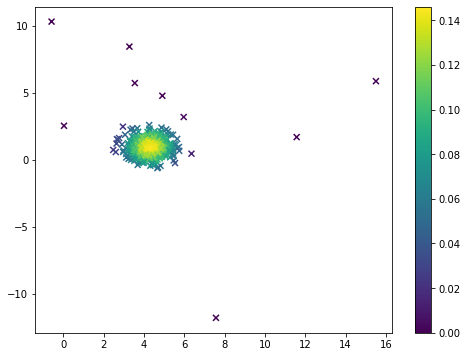

In [ ]:
plt.figure(figsize=(8,6)) #to increase the figure size of the plot
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis'); #c and cmap used to make the colors in a gradient range
plt.colorbar(); #display the color bar of the gradient colors indicating the probability density

We're getting closer to the point where we can programatically identify our outliers for a single Gaussian distribution. The last step is to identify a value for $p$, below which we consider a point to be an outlier. We term this $\epsilon$.

In [ ]:
#Choose a value for epsilon

epsilon = 0.015 #epsilon is the minimum probability density that is required for a point to be considered nominal (not an anomaly)

Now we'll highlight on the scatter plot all points that are below $\epsilon$:

[400 401 402 403 404 405 406 407 408 409]


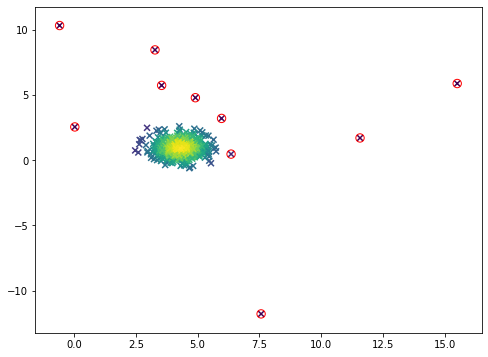

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0] #returns the row index of the atleast condittion mentioned p<epsilon from the array p
print(outliers) #prints the row index of the outliers
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

How well did your epsilon value do? Play around with different values until you're happy with the plot above. 

We can additionally look at our model's classification performance another way. By sorting the points ascending by their probability, and classifying the first $k$ points as anomalous, we can determine the model's precision@k. Implement this in the cell below. 

* What is the highest value of K for which we get precision of 1.0? _10___
* What is the precision for K=4? _1___

In [ ]:
from sklearn.metrics import precision_score

#for i in range(11):

   # mn = sorted(p)[i] #arranging the probability density in an ascending order and taking i'th row at a time
    
   # sc = precision_score(
   #         y_true, p<=mn, average='micro' #comparing rows from 0 to mn or till the i'th row
   #     )
   # print("k = {}: precision {} ".format(i+1, sc))

# Jason Riordon comment on Monday about the code
for i in range(0,15):
     mn = sorted(p)[i]
     sc = precision_score( y_true,1*(p<=mn))
     print('K is ',i+1, ', precision is', sc)


K is  1 , precision is 1.0
K is  2 , precision is 1.0
K is  3 , precision is 1.0
K is  4 , precision is 1.0
K is  5 , precision is 1.0
K is  6 , precision is 1.0
K is  7 , precision is 1.0
K is  8 , precision is 1.0
K is  9 , precision is 1.0
K is  10 , precision is 1.0
K is  11 , precision is 0.9090909090909091
K is  12 , precision is 0.8333333333333334
K is  13 , precision is 0.7692307692307693
K is  14 , precision is 0.7142857142857143
K is  15 , precision is 0.6666666666666666


You may have noticed that in this example, we are training and testing on the _entire_ dataset. This is absolutely not standard practice! You should _always_ split into a training and testing set. However, the reason that we can get away with this here is because we don't actually use labels at all during training - this is an _unsupervised_ machine learning task. Unsupervised learning methods are beneficial for anomaly detection because in the real world (i.e. testing!) we might come across types of outliers that we didn't see during training. We want to use a method that can handle this, and unsupervised methods are often better suited to this type of domain.

For the next section, we'll move to Mixture of Gaussian models. Take a look at the following dataset:

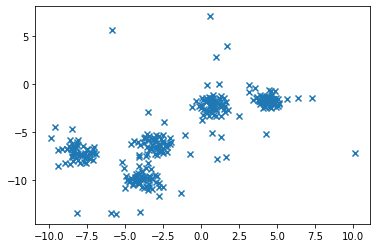

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
X, y_true = make_blobs(n_samples=400, centers=5, #400 samples with features or columns = 2 by default
                       cluster_std=0.60, random_state=1) # here X is the feature data and y_true are the labels
X_append, y_true_append = make_blobs(n_samples=50,centers=5,
                                    cluster_std=5,random_state=1)
X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=1, shuffle=True)

plt.scatter(X_train[:,0],X_train[:,1],marker="x");

Okay, we have more than one cluster centre now. So what? Let's just ignore that and use the same model as before. 

* What is the precision for k=1 in the cell below? 1___
* k=10? _0.9 __
* k=100? _0.13 __

mean of X is [-1.83507767 -5.34263936]
variance of X is  [18.71750414 12.12645659]
K is  1 , precision is 1.0
K is  2 , precision is 1.0
K is  3 , precision is 1.0
K is  4 , precision is 1.0
K is  5 , precision is 1.0
K is  6 , precision is 1.0
K is  7 , precision is 1.0
K is  8 , precision is 1.0
K is  9 , precision is 1.0
K is  10 , precision is 0.9
K is  11 , precision is 0.8181818181818182
K is  12 , precision is 0.75
K is  13 , precision is 0.7692307692307693
K is  14 , precision is 0.7857142857142857
K is  15 , precision is 0.7333333333333333
K is  16 , precision is 0.6875
K is  17 , precision is 0.6470588235294118
K is  18 , precision is 0.6111111111111112
K is  19 , precision is 0.5789473684210527
K is  20 , precision is 0.55
K is  21 , precision is 0.5238095238095238
K is  22 , precision is 0.5
K is  23 , precision is 0.4782608695652174
K is  24 , precision is 0.4583333333333333
K is  25 , precision is 0.44
K is  26 , precision is 0.4230769230769231
K is  27 , precision is 0.4

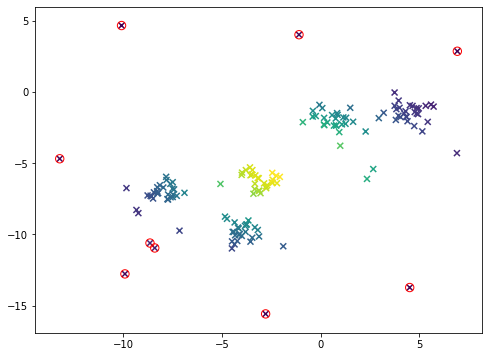

In [ ]:
mu, sigma = estimateGaussian(X_train) #take out mean and variance from the training data
p = multivariateGaussian(X_test, mu, sigma) #calculate the probability density of each point
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],marker="x",c=p,cmap='viridis');
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);


from sklearn.metrics import precision_score

#for i in range(len(p)):

#    mn = sorted(p)[i]

#    sc = precision_score(
#            y_train, p<=mn, average = 'micro' #why add micro
#        )
#    print("k = {}: precision {} ".format(i+1, sc))
    
# Jason Riordon comment on Monday about the code to know the precision of first k items
for i in range(len(p)):
     mn = sorted(p)[i] #to sort the probability density from lowest to largest and consider first i lowest densities as outliers
     sc = precision_score( y_test,1*(p<=mn))# 
     print('K is ',i+1, ', precision is', sc)



Uh oh. This model performs terribly. It's fit the mean to a section of space where we don't have _any_ points, and it has absolutely no idea which points are outliers! This was probably pretty obvious to you though. We need to move to a Mixture of Gaussians model - one in which we use multiple Gaussians to fit the data. We'll use `sklearn.mixture.GaussianMixture` to do this - or rather you will! Use the documentation, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) to initialise and fit a `GaussianMixture` object called `gm` in the cell below.

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 5, #5 components as in the X_train we have 5 centers in the data
                    covariance_type = 'full', random_state=0, ) #'full' means each component has its own general covariance matrix
gm.fit(X_train) #to train the gaussian mixture with X_train

p = gm.predict_proba(X_test)# creates the probability of a point being in each of the 5 clusters
print(p.shape)

(149, 5)


Now we can use the method `gm.predict_proba()` to get the probability of each data point being in any of the five clusters:

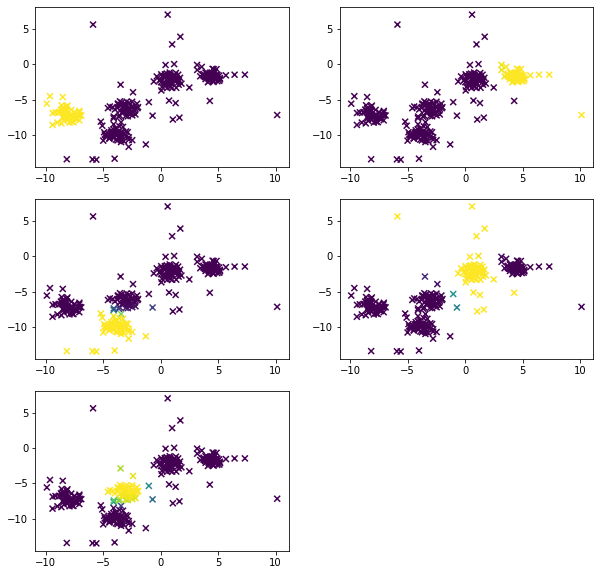

In [ ]:
#plt.subplots(3,2,figsize=(8,6))
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1)# subplot to determine the rows (3) and columns (2) to arrange the layout of multiple graphs. i+1 is the number at which each the graph should appear
    plt.scatter(X_train[:,0],X_train[:,1],c=gm.predict_proba(X_train)[:,i],cmap='viridis',marker='x')

Our Mixture of Gaussians model is powerful! Not only is it unsupervised, it can both classify points into one of the K clusters we have, _and_ it can help us with our ultimate goal of identifying outlier points! We can do this by finding the points that no cluster wants to claim for itself.

we will use the following formula to calculate the probability of each point, and set it to `p`:

$$p(x) = 1 - \bigg( \prod_{i=1}^{k} 1 - p(x \in k) \bigg)$$

This formula returns the probability that the datapoint was produced at random by _any_ of the Gaussians we fit. Hence, we want to filter out anything without a very high probability of this.

In the cell below, calculate these values and then compute precision@k for k=1, 10, and 100.

* Is this model better or worse performing than the previous? _ = Comparing the precision score of this model (k1 = 1; k10 = 1; k100 = 0.18) with that of the previous one (k1 = 1; k10 = 0.9; k100 = 0.13), it is evident that the current model performs better__
* Why might that be?  = _The current model is better than the previous one as it takes into account the possibility of multivariate gaussian clusters to calculate the outliers. When mached with the reference data, the precision score naturally comes highes because of the increase number of true positives with reference to the predicted positives___

For a k of  1  the precision is  1.000  and the recall is  0.056
For a k of  10  the precision is  1.000  and the recall is  0.556
For a k of  100  the precision is  0.180  and the recall is  1.000
(149,) (149,)


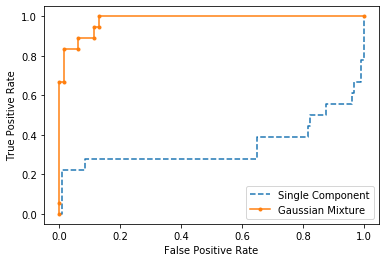

In [ ]:
k=p.shape[0]
i=0
j=0
while i<k:
  while j<5:
    p[i,j] = 1 - p[i,j]
    j=j+1
  i=i+1
p=np.subtract(p,1)
p=np.prod(p,axis=1)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#This part outputs the precision and recall on the test set
p_gm = gm.score_samples(X_test) #score_samples will compute the weighted log probabilities for each sample
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times
  
#This part computes the ROC curves for both models like we talked about in class

print(p.shape, y_test.shape)
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-p)
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()




Although our MoG model doesn't perfectly identify all the outliers, it performs way better than our previous model, again without any label information to help it along!

Let's look at a dataset that motivates using a Mixture of Gaussians model: Simpsons ratings.

Everyone knows that there's a certain point when The Simpsons "got bad", but can we use a Mixture of Gaussians to find out exactly when that was?

Load up the `simpsons.pickle` file using the cell below. It contains the IMDb rating for every simpsons episode.

In [ ]:
!wget https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
with open('simpsons.pickle','rb') as f:
    simpsons = pickle.load(f)
    
simpsons

--2019-10-25 23:30:30--  https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle [following]
--2019-10-25 23:30:30--  https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26076 (25K) [application/octet-stream]
Saving to: ‘simpsons.pickle’

simpsons.pickle     100%[===================>]  25.46K  --.-KB/s    in 0.003s  

2019-10-25 23:30:30 (7.52 MB/s) - ‘simpsons.pickle’ saved [26076/26076]



{1: {'Bart the General': 8.1,
  'Bart the Genius': 7.8,
  "Homer's Night Out": 7.4,
  "Homer's Odyssey": 7.4,
  'Krusty Gets Busted': 8.4,
  'Life on the Fast Lane': 7.5,
  'Moaning Lisa': 7.6,
  'Simpsons Roasting on an Open Fire': 8.2,
  'Some Enchanted Evening': 7.8,
  'The Call of the Simpsons': 7.8,
  'The Crepes of Wrath': 7.8,
  'The Telltale Head': 7.7,
  "There's No Disgrace Like Home": 7.7},
 2: {'Bart Gets Hit by a Car': 7.8,
  'Bart Gets an F': 8.2,
  'Bart the Daredevil': 8.4,
  'Bart vs. Thanksgiving': 7.8,
  "Bart's Dog Gets an F": 7.5,
  'Blood Feud': 7.9,
  'Brush with Greatness': 8.0,
  "Dancin' Homer": 7.5,
  'Dead Putting Society': 8.0,
  'Homer vs. Lisa and the 8th Commandment': 8.0,
  'Itchy and Scratchy and Marge': 8.1,
  "Lisa's Substitute": 8.5,
  'Oh Brother, Where Art Thou?': 8.3,
  'Old Money': 7.6,
  'One Fish, Two Fish, Blowfish, Blue Fish': 8.8,
  'Principal Charming': 7.5,
  'Simpson and Delilah': 8.3,
  'The War of the Simpsons': 7.9,
  'The Way We Was'

With `plt.hist`, plot a histogram of the rating distribution for all Simpsons episodes. 

* What is the modal rating? _7.1_
* What is the range of ratings? _5.3_

the mode of the rating is:  [7.1]
the range of the ratings is:  5.300000000000001
max rating is:  9.3
min rating is:  4.0


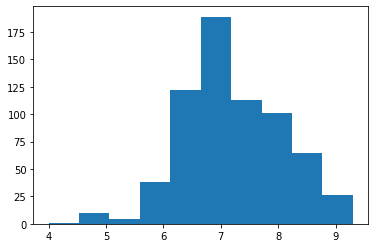

In [ ]:
#converting simpsons dict to array
ratings = [] #create empty array to fill in the data we want
for i,j in simpsons.items(): #attaching the keys to i and values to j in the 1 level of the nested dictionary
  for i1,j1 in j.items(): #attaching the keys to i1 and values to j1 in the 2nd level of the nested dictionary
    ratings.append(j1) #appeding the values we want to the empty list 'rating'
    
ratings = np.asarray(ratings) #converting rating list into array  

plt.hist(ratings) #plotting histogram of the rating array

#calculating the mode of the ratings array
from scipy import stats
print("the mode of the rating is: ", stats.mode(ratings)[0])

#calculating the range of ratings
print("the range of the ratings is: ", np.ptp(ratings))
print("max rating is: ", np.max(ratings))
print("min rating is: ", np.min(ratings))

#simpsons


## Next, use `sklearn.mixture.GaussianMixture` to fit a Mixture of Gaussians to the Simpsons rating distribution. Since we are trying to distinguish between good and bad ratings, we only need 2 gaussians.

* What are the means for the two Gaussians fit by the model? _for good and bad respectively  mean of good episodes =  8.231944444444444 and mean of bad episodes =  6.726048565121413
* What about the standard deviations? _ standard deviation of good episodes =  0.3881913386876358 and standard deviation of bad episodes =  0.5369619118444732 

(669, 1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1

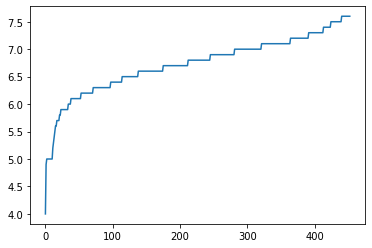

In [ ]:
gm = GaussianMixture(n_components = 2, #2 components as in the X_train we have 2 centers in the data namely good and bad
                    covariance_type = 'full', random_state=0, ) #'full' means each component has its own general covariance matrix
ratings=np.reshape(ratings, (-1,1))#to make ratings a 2D array in order to put it in the gm.fit() function
print(ratings.shape)
gm.fit(ratings) #to train the gaussian mixture with ratings

#print("the mean of each cluster is: ",gm.means_)

#print("the standard deviation of each cluster is: ", np.sqrt(gm.covariances_))

#simpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))

ratings = np.asarray(sorted(ratings))
#print(ratings)
print(gm.predict(ratings))

goodrate = []
badrate = []

i=0
while i < ratings.shape[0]:
  if gm.predict(ratings)[i]==0:
    goodrate.append(ratings[i])
  else:
    badrate.append(ratings[i])
  i=i+1

goodrate=np.asarray(goodrate)
badrate=np.asarray(badrate)

plt.plot(goodrate)

print(" mean of good episodes = ", np.mean(goodrate))
print(" standard deviation of good episodes = ", np.std(goodrate), "\n")
print(" mean of bad episodes = ", np.mean(badrate))
print(" standard deviation of bad episodes = ", np.std(badrate), "\n")

Finally, using the `GaussianMixture.predict()` method, we can use maximum likelihood to estimate which distribution, good or bad, each episode belongs to. In the cell below, count the number of episodes predicted to be in the "good" distribution per season, and plot using `plt.plot`.

* Where is the notable drop-off point? _9_
* When is the first season with 0 good episodes? _15_

[[ 1  9]
 [ 2 18]
 [ 3 24]
 [ 4 21]
 [ 5 21]
 [ 6 24]
 [ 7 24]
 [ 8 24]
 [ 9 20]
 [10 10]
 [11  4]
 [12  5]
 [13  4]
 [14  1]
 [15  0]
 [16  0]
 [17  0]
 [18  1]
 [19  1]
 [20  0]
 [21  0]
 [22  0]
 [23  2]
 [24  0]
 [25  1]
 [26  1]
 [27  1]
 [28  0]
 [29  0]
 [30  0]
 [31  0]
 [32  0]]


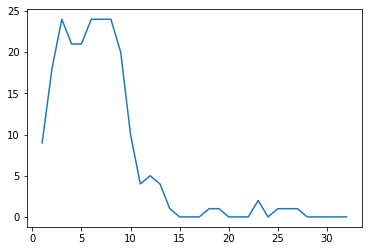

In [ ]:
simpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))

seasonrate = []
scorelist = []
for i,j in simpsons.items():
  for i1,j1 in j.items():
    seasonrate.append(j1)
  seasonrate = np.asarray(seasonrate).reshape(-1,1)
  score = gm.predict(seasonrate)
  total = np.sum(score, axis=0)
  scorelist.append(total)
  total = 0
  score = []
  seasonrate = []

scorelist2 = np.asarray(scorelist).reshape(-1,1) #conversting scorelist to array and then reshaping it from (1,32) to (32,1) (32 rows, 1 column) 

index = np.arange(1,33,1).reshape(-1,1) #create and array index with start as 1, end as 33 (32+1) & step as +1, also reshaped it to 32 rows 1 column
scorelist2 = np.hstack((index, scorelist2)) #horizonatally stacked 2 arrays with 1 column and 32 rows each.
plt.plot(scorelist2[:,0], scorelist2[:,1]) #ploting x axis as index and y axis as no. of good episodes
print(scorelist2)


    
  

## Exercises

Now we are going to work with a credit card fraud dataset (more detail can be found [here](https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3)). This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load up the dataset using Pandas' `read_csv` function. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?[1] _284807____
* What features in the dataset are present aside from the 28 main features?[1] __'time', amount' which were not transformed by the PCA whereas 'class' is the target data for fraud detection___
* Why do you think the main features are given to us in this way?[1] _this is a result of PCA transformation to normalise the data. Also the features are disguised for confidentiality purposes____
* Which column contains the targets? Can you figure out what the values correspond to?[1] _'class' column contains targets where 1 corresponds to fraudulent transaction and 0 otherwise____

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=c14628067d3d987bdfbae6266a1f2ece98554aeec1cc3c43a9d220ea41497b70
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
wget.download('https://github.com/alexwolson/APS1070_data/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
#print(df.head(10)) #print first 10 rows and all 28 columns only
print(df.iloc[:11]) #print first 10 rows and 10 columns only
print("no. of rows are: ", df.shape[0])

frauddf = df[df.Class==1] #storing fraud transactions in 'fraudindex' dataframe by filtering df by column 'Class' and equating it with 1

totalentries = df.shape[0]
totalfraud = frauddf.shape[0]

fraudpercent = ((totalfraud)*100)/totalentries

print("percentage of entries in the dataset for fraud: ", "{0:.2f}".format(fraudpercent), "%")
print("percentage of entries in the dataset for no fraud: ", "{0:.2f}".format(100-fraudpercent),"%")

    Time        V1        V2        V3  ...       V27       V28  Amount  Class
0    0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1    0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2    1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3    1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4    2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0
5    2.0 -0.425966  0.960523  1.141109  ...  0.253844  0.081080    3.67      0
6    4.0  1.229658  0.141004  0.045371  ...  0.034507  0.005168    4.99      0
7    7.0 -0.644269  1.417964  1.074380  ... -1.206921 -1.085339   40.80      0
8    7.0 -0.894286  0.286157 -0.113192  ...  0.011747  0.142404   93.20      0
9    9.0 -0.338262  1.119593  1.044367  ...  0.246219  0.083076    3.68      0
10  10.0  1.449044 -1.176339  0.913860  ...  0.042850  0.016253    7.80      0

[11 rows x 31 columns]
no. of rows are:  284807
per

It's always important when looking at a new dataset to figure out how many rows we have for each class.

* What is the percentage of entries in the dataset for each class?[1] _**for fraud:0.17 % and for no fraud:  99.83 %____**
* Why might this pose a problem with methods we have looked at so far?[1] __the data has a skewed class with one class being too low than the other. Hence the original accuracy score won't give a good picture of the classifier efficiency to predict true positives. Hence we must move to other evaluation metrics like Precision score and recall score___



Next, split the dataset into a training and testing set using sklearn's `train_test_split` function. Use a test size of one third, and set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in these exercises we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V24? Make sure to only use your training set for this.[1] _mean for variable V24 is:  0.0003621464275780459_and_standard deviation for variable V24 is:  0.6052978059122935__

Use the code below to set up a Gaussian object for V24.

In [ ]:
from scipy import stats

#norm = stats.norm(
    
# ) 

#splitting the data

X = df.iloc[:,:(df.shape[1]-1)] #selecting feature data from df
y_true = df.iloc[:,-1] #selecting target data from df
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.30, random_state=0, shuffle=True) #why random state is 0 in the question?

# What are the mean and standard deviation for variable V24? Make sure to only use your training set for this

locv24 = X_train.V24.mean()
scalev24 = X_train.V24.std()

print("mean for variable V24 is: ", locv24)
print("standard deviation for variable V24 is: ", scalev24)

norm = stats.norm(locv24, scalev24)





mean for variable V24 is:  0.0003621464275780459
standard deviation for variable V24 is:  0.6052978059122935


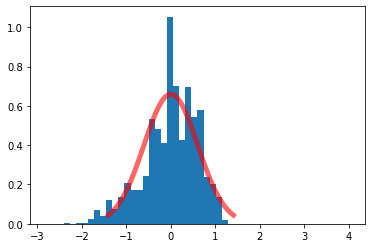

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train['V24'].values, density=True, histtype='stepfilled', bins=50);
plt.show()

We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

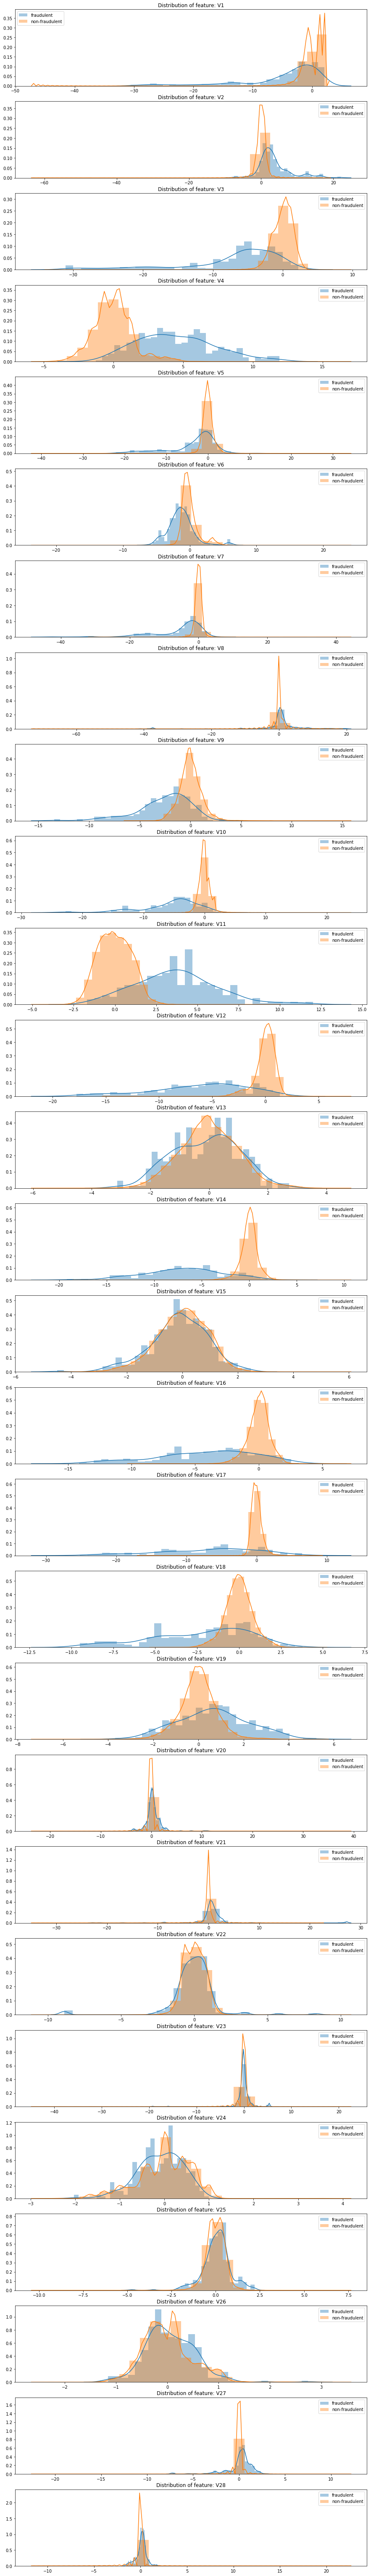

In [ ]:
import matplotlib.gridspec as gridspec
import seaborn as sns
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Build an outlier detection model using a Mixture of Gaussians using a subset of features of your choice (pick a few) and a number of mixture components. Report the precision@k for k=1, 10 and 100 (on test data). Repeat this model creation process at least 4 more times, each time selecting different parameters (features selected, number of mixture components), and reporting the precision as above. Organize your findings in a table or plot and describe your findings. What can you conclude about what models work best? [3] - = 

= Iteration 3 with n_components as 8 and the features V12, V18 and V22 is the best performing trial with highest precision and recall score compared to the other 3 trials. This is due to the fact that the probability distribution in the features V12 and V18 are distinguishable to a notable extent between fraudulent and non fraudulent data. This means that the classifier would perform well to predict the true positives with referece to the predicted positives (Precision Score) and the actual positives (Recall Score), thus giving a high precision and recall score.

For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.600  and the recall is  0.041
For a k of  100  the precision is  0.280  and the recall is  0.190
(149,) (85443,)


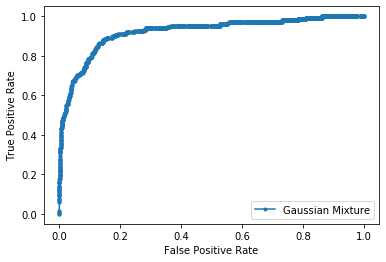

In [ ]:
# To Build an outlier detection model using a Mixture of Gaussians trial 1

from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


gm = GaussianMixture(n_components = 4, #2 components as in the X_train we have 2 centers in the data namely good and bad
                    covariance_type = 'full', random_state=0, ) #'full' means each component has its own general covariance matrix

training = X_train.loc[:,['V1','V2','V3']]
testing = X_test.loc[:,['V1','V2','V3']]

gm.fit(training)

#This part outputs the precision and recall on the test set

pre1 = []
re1 = []

p_gm = gm.score_samples(testing) #score_samples will compute the weighted log probabilities for each sample
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   pre1.append(precision)
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   re1.append(recall)
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times

re1 = np.asarray(re1).reshape(-1,1)
pre1 = np.asarray(pre1).reshape(-1,1)  

try1 = np.hstack((pre1,re1))
try1 = pd.DataFrame(try1)
try1.insert(0, "k Value", [1,10,100])
try1.columns = ['K Values', 'Precision Score', 'Recall Score']
#print(try1)

#This part computes the ROC curves

print(p.shape, y_test.shape)
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()


For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.120  and the recall is  0.082
(149,) (85443,)


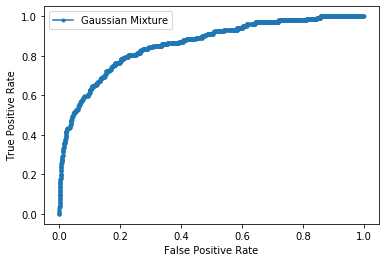

In [ ]:
# To Build an outlier detection model using a Mixture of Gaussians trial 2

gm = GaussianMixture(n_components = 5, #5 components as in the X_train we have 2 centers in the data namely good and bad
                    covariance_type = 'full', random_state=0, ) #'full' means each component has its own general covariance matrix

training = X_train.loc[:,['V5','V15','V19','V21']]
testing = X_test.loc[:,['V5','V15','V19','V21']]

gm.fit(training)

#This part outputs the precision and recall on the test set

pre1 = []
re1 = []

p_gm = gm.score_samples(testing) #score_samples will compute the weighted log probabilities for each sample
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   pre1.append(precision)
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   re1.append(recall)
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times

re1 = np.asarray(re1).reshape(-1,1)
pre1 = np.asarray(pre1).reshape(-1,1)  

try2 = np.hstack((pre1,re1))
try2 = pd.DataFrame(try2)
try2.insert(0, "k Value", [1,10,100])
try2.columns = ['K Values', 'Precision Score', 'Recall Score']
#print(try2)

#This part computes the ROC curves

print(p.shape, y_test.shape)
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()


For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.800  and the recall is  0.054
For a k of  100  the precision is  0.440  and the recall is  0.299
   K Values  Precision Score  Recall Score
0         1             0.00      0.000000
1        10             0.80      0.054422
2       100             0.44      0.299320
(149,) (85443,)


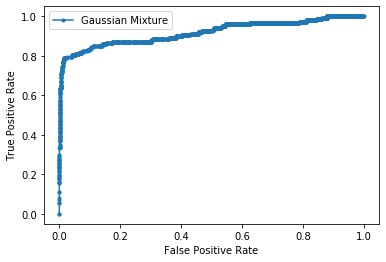

In [ ]:
# To Build an outlier detection model using a Mixture of Gaussians trial 3

gm = GaussianMixture(n_components = 8, #5 components as in the X_train we have 2 centers in the data namely good and bad
                    covariance_type = 'full', random_state=0, ) #'full' means each component has its own general covariance matrix

training = X_train.loc[:,['V12','V18','V22']]
testing = X_test.loc[:,['V12','V18','V22']]

gm.fit(training)

#This part outputs the precision and recall on the test set

pre1 = []
re1 = []

p_gm = gm.score_samples(testing) #score_samples will compute the weighted log probabilities for each sample
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   pre1.append(precision)
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   re1.append(recall)
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times

re1 = np.asarray(re1).reshape(-1,1)
pre1 = np.asarray(pre1).reshape(-1,1)  

try3 = np.hstack((pre1,re1))
try3 = pd.DataFrame(try3)
try3.insert(0, "k Value", [1,10,100])
try3.columns = ['K Values', 'Precision Score', 'Recall Score']
print(try3)

#This part computes the ROC curves

print(p.shape, y_test.shape)
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()


For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.300  and the recall is  0.020
For a k of  100  the precision is  0.370  and the recall is  0.252
(149,) (85443,)


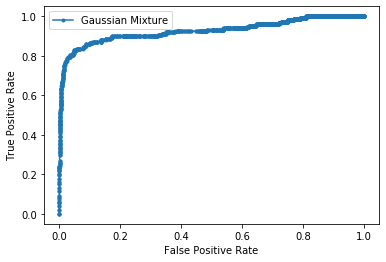

In [ ]:
# To Build an outlier detection model using a Mixture of Gaussians trial 4

gm = GaussianMixture(n_components = 7, #5 components as in the X_train we have 2 centers in the data namely good and bad
                    covariance_type = 'full', random_state=0, ) #'full' means each component has its own general covariance matrix

training = X_train.loc[:,['V11','V12','V16', 'V22', 'V23', 'V27']]
testing = X_test.loc[:,['V11','V12','V16', 'V22', 'V23', 'V27']]

gm.fit(training)

#This part outputs the precision and recall on the test set

pre1 = []
re1 = []

p_gm = gm.score_samples(testing) #score_samples will compute the weighted log probabilities for each sample
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   pre1.append(precision)
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   re1.append(recall)
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times

re1 = np.asarray(re1).reshape(-1,1)
pre1 = np.asarray(pre1).reshape(-1,1)  

try4 = np.hstack((pre1,re1))
try4 = pd.DataFrame(try4)
try4.insert(0, "k Value", [1,10,100])
try4.columns = ['K Values', 'Precision Score', 'Recall Score']
#print(try4)

#This part computes the ROC curves

print(p.shape, y_test.shape)
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()


In [ ]:
print("Results for the 1st iteration are: \n", try1 )
print("\n\nResults for the 2nd iteration are: \n", try2 )
print("\n\nResults for the 3rd iteration are: \n", try3 )
print("\n\nResults for the 4th iteration are: \n", try4 )

Results for the 1st iteration are: 
    K Values  Precision Score  Recall Score
0         1             0.00      0.000000
1        10             0.60      0.040816
2       100             0.28      0.190476


Results for the 2nd iteration are: 
    K Values  Precision Score  Recall Score
0         1             0.00      0.000000
1        10             0.00      0.000000
2       100             0.12      0.081633


Results for the 3rd iteration are: 
    K Values  Precision Score  Recall Score
0         1             0.00      0.000000
1        10             0.80      0.054422
2       100             0.44      0.299320


Results for the 4th iteration are: 
    K Values  Precision Score  Recall Score
0         1             0.00      0.000000
1        10             0.30      0.020408
2       100             0.37      0.251701
